In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 1. Load merged dataset
df = pd.read_csv("../data/merged_gz2_sdss.csv")
print(df.shape)
df.info()


(48664, 248)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48664 entries, 0 to 48663
Columns: 248 entries, dr7objid to redshift
dtypes: float64(166), int64(78), object(4)
memory usage: 92.1+ MB


In [25]:
available_fractions = [col for col in df.columns if "_fraction" in col]

morph_map = {
    col: col.replace("_fraction", "").replace("t0", "q") 
    for col in available_fractions
}

df_morph = df[list(morph_map.keys())].rename(columns=morph_map)


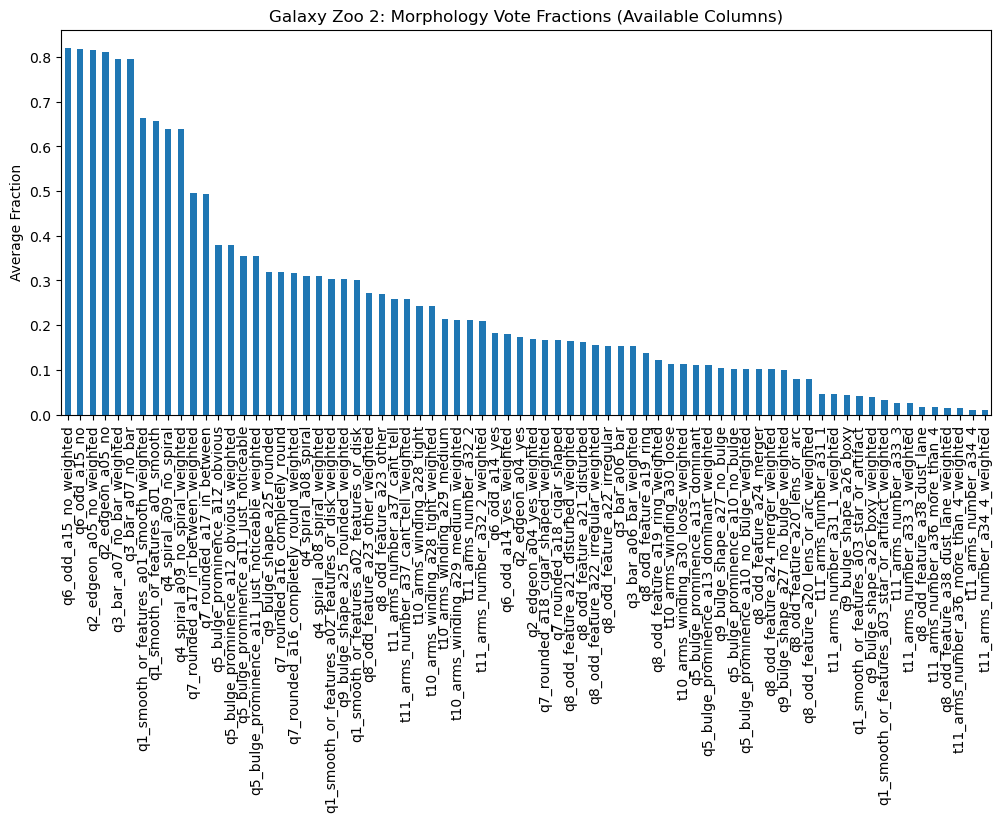

In [27]:
df_morph.mean().sort_values(ascending=False).plot(kind="bar", figsize=(12,5))
plt.title("Galaxy Zoo 2: Morphology Vote Fractions (Available Columns)")
plt.ylabel("Average Fraction")
plt.show()


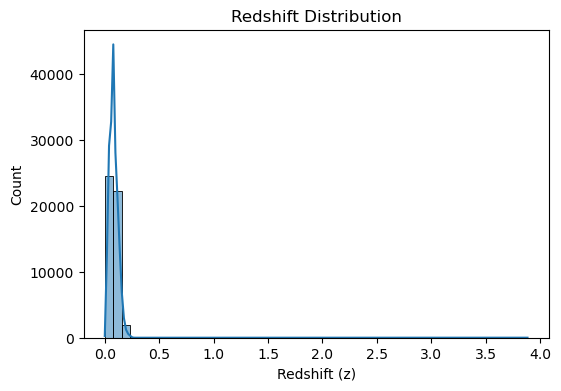

In [29]:
# 3. Redshift distribution
plt.figure(figsize=(6,4))
sns.histplot(df['redshift'], bins=50, kde=True)
plt.xlabel("Redshift (z)")
plt.title("Redshift Distribution")
plt.show()

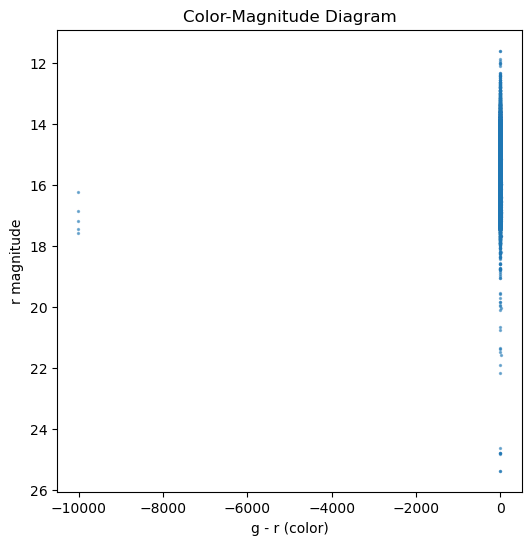

In [31]:
# 4. Color-Magnitude Diagram (g-r vs r)
df['g-r'] = df['g'] - df['r']
plt.figure(figsize=(6,6))
plt.scatter(df['g-r'], df['r'], s=2, alpha=0.5)
plt.gca().invert_yaxis()  # astronomers use mag where lower = brighter
plt.xlabel("g - r (color)")
plt.ylabel("r magnitude")
plt.title("Color-Magnitude Diagram")
plt.show()

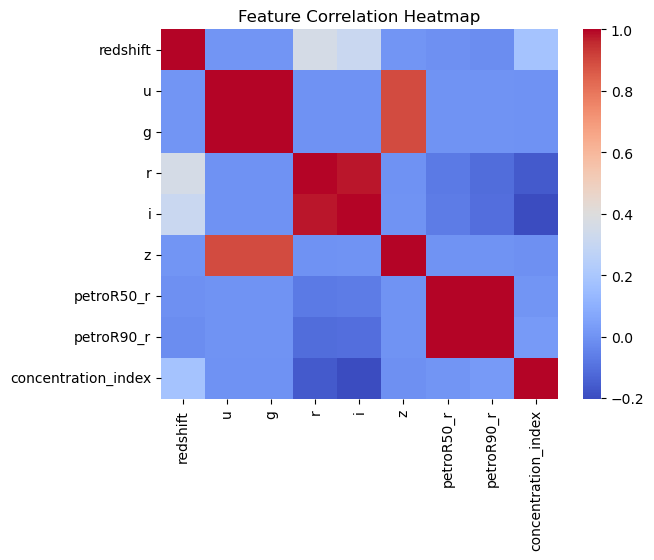

In [33]:
# 5. Correlation heatmap
num_cols = ['redshift','u','g','r','i','z','petroR50_r','petroR90_r','concentration_index']
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()